In [23]:
import numpy as np

In [24]:
def mean_squared_error(y_hat, y):
    return np.sum((y_hat - y)**2)/y.size

In [25]:
y = np.array([1,2,3,4])
y_hat1 = np.array([1.2, 1.9, 2.9, 4.2])
mean_squared_error(y_hat1, y)

np.float64(0.025000000000000022)

In [26]:
y_hat2 = np.array([2.2, 0.9, 2.9, 5.2])
mean_squared_error(y_hat2, y)

np.float64(1.0250000000000004)

In [27]:
def cross_entropy_error(y_hat, y):
    return -np.sum(y*np.log(y_hat + 1e-7))

In [28]:
y = np.array([0, 1, 0, 0, 0])

In [29]:
y_hat1 = np.array([0.1, 0.7, 0.1, 0.1, 0])

In [30]:
cross_entropy_error(y_hat1, y)

np.float64(0.3566748010815999)

In [31]:
y_hat2 = np.array([0.7, 0.05, 0.05, 0.2, 0])

In [32]:
cross_entropy_error(y_hat2, y)

np.float64(2.9957302735559908)

In [33]:
import mnist
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [34]:
(train_images, train_labels), (_, _) = my_mnist.load()

In [35]:
train_size = train_images.shape[0]
batch_size = 32

In [36]:
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[23030 18610 41027 37250 10059 49890 49578 48924 31162 32658 56952 19400
 49530 36029 41333 44548  2172 21414 53832 36336 40435  9115 50560  2917
 36844 48099 52507 13130 35613 35708  2827  2185]


In [37]:
train_size

60000

In [38]:
#for mini-batch training
def cross_entropy_error(y_hat, y):
    batch_size = 1 if y_hat.ndim == 1 else y_hat.shape[0]
    return -np.sum(y*np.log(y_hat + 1e-7))/batch_size

In [39]:
y_hat_batch = np.array([ [0.2, 0.2, 0.3, 0.1, 0.2], [0.1, 0.1, 0.1, 0.1, 0.6]])
y_batch =     np.array([ [0,   0,   1,   0,    0],   [0,   0,   0,   0,   1]])

In [40]:
cross_entropy_error(y_hat_batch, y_batch)

np.float64(0.8573989640459981)

In [41]:
(0.1/10e-50)

1e+48

In [42]:
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h) - f(x))/h

In [43]:
def func(x):
    return x**2 + 0.1*x

In [44]:
numerical_diff(func, 0.8)

0.0

In [45]:
# More reasonable approximation
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x - h))/(2*h)

In [46]:
numerical_diff(func, 0.8)

1.6999999999994797

In [47]:
numerical_diff(func, 0.2)

0.49999999999994493

In [48]:
def func(x):
    return x[0]**2 + x[1]**2

def func_tmp1(x0):
    return x0**2 + 4.0**2

In [49]:
numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [50]:
def func_tmp2(x1):
    return 3.0**2 + x1**2

In [51]:
numerical_diff(func_tmp2, 4.0)

7.999999999999119

##  Numerical Gradient

In [52]:
import numpy as np

In [53]:
def func2(x):
    return x[0]**2 + x[1]**2

In [54]:
# partial derivatives when x0 = 3, x1 = 4

def func_tmp1(x0):
    return x0**2 + 4**2

def func_tmp2(x1):
    return 3**2 + x1**2

In [55]:
def _numerical_diff(f, x):
    h = 1e-4
    return (f(x + h) - f(x - h))/(2*h)

In [56]:
def _numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) 
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val 
        
    return grad

In [57]:
_numerical_diff(func_tmp1, 3.0)

6.00000000000378

In [58]:

_numerical_diff(func_tmp2, 4.0)

7.999999999999119

In [59]:
_numerical_gradient(func2, np.array([3.0, 4.0]))

array([6., 8.])

In [60]:
def gradient_descent(f, init_x, lr=0.1, step_num = 100):
    x = init_x
    for i in range(step_num):
        grad = _numerical_gradient(f, x)
        x -= lr*grad  # x = x - lr*grad

    return x

In [61]:
init_x = np.array([2800.0, 1000.0])
# func2 = x0**2 + x1**2
gradient_descent(func2, init_x, step_num=10000, lr=0.001)

array([5.65680105e-06, 2.02028609e-06])

## SampleNet

In [62]:
class SimpleNet:
    def __init__(self):
        self.w = np.random.randn(2, 3)


    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))


    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size


    # for multi-dimensional x
    def numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad


    def predict(self, x):
        return np.dot(x, self.w)
    

    def loss(self, x, y):
        z = self.predict(x)
        y_hat = self.softmax(z)
        loss = self.cross_entroy_error(y_hat, y)

        return loss



### let's test SimpleNet

In [63]:

net = SimpleNet()
print(net.w)

[[-0.04396916  0.50767525  0.04783617]
 [ 1.46877292  0.82037499  0.86110457]]


In [64]:

x = np.array([0.7, 0.19])
p = net.predict(x)
print(p)


[0.24828844 0.51124392 0.19709519]


In [65]:
np.argmax(p)

np.int64(1)

In [66]:
y = np.array([0, 1, 0])
net.loss(x, y)

np.float64(0.9159650300431031)

In [67]:
y = np.array([0, 0, 1])
net.loss(x, y)

np.float64(1.2301136736662086)

In [68]:
def loss_function(w):
    return net.loss(x, y)

In [69]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.21532731  0.28009105 -0.49541835]
 [ 0.05844598  0.07602471 -0.1344707 ]]


### Using Lambda

In [70]:
loss_function = lambda w: net.loss(x, y)

In [71]:
dw = net.numerical_gradient(loss_function, net.w)
print(dw)

[[ 0.21532731  0.28009105 -0.49541835]
 [ 0.05844598  0.07602471 -0.1344707 ]]


## TwoLayerNet Class

In [72]:
class Activations:
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    # for multi-dimensional x
    def softmax(self, x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T 

        x = x - np.max(x)  
        return np.exp(x) / np.sum(np.exp(x))

In [73]:
class Errors:
    def cross_entroy_error(self, y, t):
        delta = 1e-7
        batch_size = 1 if y.ndim == 1 else y.shape[0]

        return -np.sum(t*np.log(y + delta)) / batch_size

In [74]:
import activations
import errors

In [75]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = activations.Activations()
        self.errors = errors.Errors()

    def predict(self, x):
        w1, w2 = self.params['w1'], self.params['w2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, w1) + b1
        z1 = self.activations.sigmoid(a1)
        a2 = np.dot(z1, w2) + b2
        y = self.activations.softmax(a2)

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        return self.errors.cross_entropy_error(y_hat, y)
    

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    
    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads

## Train TwoLayerNet

In [88]:
import mnist
from two_layer_net import TwoLayerNet

import matplotlib.pyplot as plt
import numpy as np

In [89]:
my_mnist = mnist.Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [78]:
(x_train, y_train), (x_test, y_test) = my_mnist.load()

In [87]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [93]:
network = TwoLayerNet(input_size=28*28, hidden_size=100, output_size=10)

In [92]:
network.params

{'w1': array([[-0.00288059, -0.00627054, -0.00402947, ...,  0.00713884,
         -0.00233731, -0.02418013],
        [-0.00290337,  0.0092901 ,  0.01626799, ..., -0.01233794,
         -0.00702157,  0.01187496],
        [-0.00682652, -0.00418928, -0.00250892, ..., -0.00208008,
          0.01046547,  0.00911338],
        ...,
        [ 0.00215674, -0.02274471, -0.00834287, ..., -0.00991416,
         -0.01293192, -0.00537784],
        [-0.00372493,  0.0076987 , -0.00677003, ..., -0.01800163,
         -0.0064099 , -0.00943463],
        [ 0.00731781, -0.0017486 , -0.01240356, ...,  0.01625167,
         -0.00897982, -0.00130714]]),
 'b1': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [94]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1

iter_per_ecoph = max(train_size/batch_size, 1)

In [95]:
train_losses = []
train_accs = []
test_accs = []

In [96]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.numerical_gradient(x_batch, y_batch)

    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## this is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_ecoph == 0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs.append(test_acc)
        print(f'train acc, test_acc : {train_acc}, {test_acc}')

train acc, test_acc : 0.11236666666666667, 0.1135


KeyboardInterrupt: 

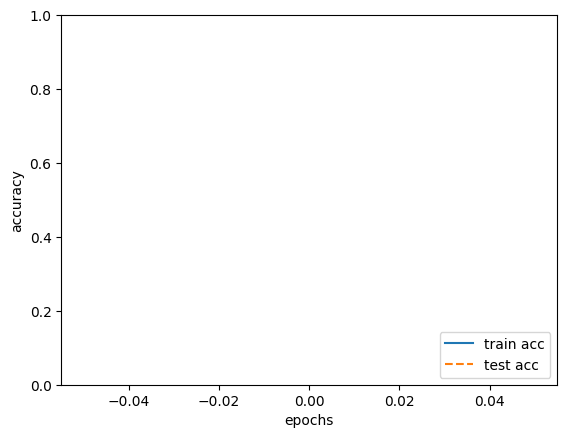

In [97]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='train acc')
plt.plot(x, test_accs, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

## Backpropagation

In [100]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self,x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
    
class Sigmoid:
    def __init__ (self):
        self.out = None
        self.activations = Activations()

    def forward(self,x):
        out = self.activations.sigmoid(x)
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout *(1.0 - self.out) * self.out
        return dx
    
class Affine:
    def __init__(self, w, b):
        self.w = w
        self.b = b
        self.x = None
        self.original_x_shape = None
        self.dw = None
        self.db = None

    def forward(self, x):
        self.original_x_shape = x.shape
        X = x.reshape(x.shape[0],-1)
        self.x = x
        out = np.dot(self.x, self.w)+ self.b
        return out
    
    def backward(self, dout):
        dx = np.dot(dout, self.w.T)
        self.dw = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        dx = dx.reshape(*self.original_x_shape)
        return dx
    
class SoftmaxWithLoss:
    def __init__( self):
        self.loss = None
        self.y_hat = None
        self.y = None
        self.activations = Activations()
        self.errors = Errors()

    def forward(self, x, y):
        self.y = y
        self.y_hat = self.activations.softmax(x)
        self.loss = self.errors.cross_entropy_error(self.y_hat, self.y)
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.y.shape[0]
        dx = (self.y_hat - self.y)/ batch_size
        """
        else:
            dx = self.y_hat.copy()
            dx[np.arrange(batch_size), self.t] -=1
            dx = dx/batch_size
        """
        return dx




## Two Layer Net with Backpropagation 

In [101]:
from activations import Activations
from errors import Errors

In [102]:
from collections import OrderedDict

In [103]:
class TwoLayerNetWithBackprop:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}

        self.params['w1'] = weight_init_std*np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

        self.params['w2'] = weight_init_std*np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        self.activations = Activations()
        self.errors = Errors()

        # Add Layers
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['w1'], self.params['b1'])
        self.layers['Rele1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['w2'], self.params['b2'])

        self.last_layer = SoftmaxWithLoss()


    def predict(self, x):
        ## new implementation for backprop
        for layers in self.layers.values():
            x = layers.forward(x)
        y = x

        return y
    
    def loss(self, x, y):
        y_hat = self.predict(x)

        #return self.errors.cross_entropy_error(y_hat, y)
        return self.last_layer.forward(y_hat, y)

    def accuracy(self, x, y):
        y_hat = self.predict(x)
        p = np.argmax(y_hat, axis=1)
        y_p = np.argmax(y, axis=1)

        return np.sum(p == y_p)/float(x.shape[0])
    

    # for multi-dimensional x
    def _numerical_gradient(self, f, x):
        h = 1e-4 # 0.0001
        grad = np.zeros_like(x)
        
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + h
            fxh1 = f(x) # f(x+h)
            
            x[idx] = tmp_val - h 
            fxh2 = f(x) # f(x-h)
            grad[idx] = (fxh1 - fxh2) / (2*h)
            
            x[idx] = tmp_val 
            it.iternext()   
            
        return grad
    

    def numerical_gradient(self, x, y):
        loss_w = lambda w: self.loss(x, y)

        grads = {}
        grads['w1'] = self._numerical_gradient(loss_w, self.params['w1'])
        grads['b1'] = self._numerical_gradient(loss_w, self.params['b1'])
        grads['w2'] = self._numerical_gradient(loss_w, self.params['w2'])
        grads['b2'] = self._numerical_gradient(loss_w, self.params['b2'])

        return grads
    
    def gradient(self, x, y):
        self.loss(x, y)
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['w1'] = self.layers['Affine1'].dw
        grads['b1'] = self.layers['Affine1'].db
        grads['w2'] = self.layers['Affine2'].dw
        grads['b2'] = self.layers['Affine2'].db
        return grads

In [105]:
from mnist import Mnist

In [106]:
mnist = Mnist()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [107]:
(x_train, y_train), (x_test, y_test) = mnist.load()

In [108]:
print(x_train.shape)

(60000, 784)


In [111]:
network =  TwoLayerNetWithBackprop(input_size=28*28, hidden_size = 100, output_size=10)

In [112]:
iterations = 10000
train_size = x_train.shape[0]
batch_size = 100
lr = 0.1
iter_per_epoch = max(train_size/batch_size, 1)

In [113]:
train_losses = []
train_accs = []
test_accs = []

In [114]:
for i in range(iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    y_batch = y_train[batch_mask]

    grads = network.gradient(x_batch, y_batch)
    
    for key in ('w1', 'b1', 'w2', 'b2'):
        network.params[key] -= lr*grads[key]

    ## This is for plotting losses over time
    train_losses.append(network.loss(x_batch, y_batch))

    if i%iter_per_epoch ==0:
        train_acc = network.accuracy(x_train, y_train)
        train_accs.append(train_acc)
        test_acc = network.accuracy(x_test, y_test)
        test_accs .append(test_acc)
        print(f"train_acc, test_acc : {train_acc}, {test_acc}")
        

train_acc, test_acc : 0.1495, 0.1545
train_acc, test_acc : 0.9073833333333333, 0.9118
train_acc, test_acc : 0.92765, 0.9285
train_acc, test_acc : 0.9386333333333333, 0.9367
train_acc, test_acc : 0.9498666666666666, 0.9468
train_acc, test_acc : 0.9557166666666667, 0.9517
train_acc, test_acc : 0.9598166666666667, 0.956
train_acc, test_acc : 0.9644, 0.9599
train_acc, test_acc : 0.9683833333333334, 0.963
train_acc, test_acc : 0.97225, 0.9657
train_acc, test_acc : 0.9744666666666667, 0.9681
train_acc, test_acc : 0.9755666666666667, 0.9676
train_acc, test_acc : 0.97735, 0.9697
train_acc, test_acc : 0.9797, 0.9709
train_acc, test_acc : 0.98125, 0.972
train_acc, test_acc : 0.9827, 0.9742
train_acc, test_acc : 0.9839666666666667, 0.9744


<function matplotlib.pyplot.show(close=None, block=None)>

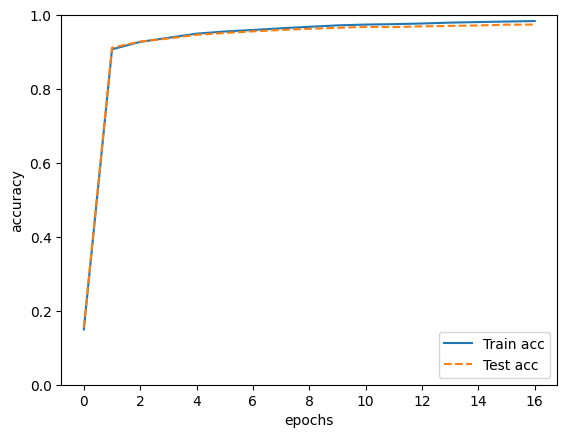

In [119]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_accs))
plt.plot(x, train_accs, label='Train acc')
plt.plot(x, test_accs, label='Test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show

In [125]:
import numpy as np
import pickle
my_weight_pkl_file = 'RishiD_weights.pkl'

In [126]:

with open(f'{my_weight_pkl_file}','wb') as f:
    print(f'Pickle: {my_weight_pkl_file} is being created.')
    pickle.dump(network.params, f)
    print('Done')

Pickle: RishiD_weights.pkl is being created.
Done


In [152]:
network.params = None

## Using your own TwoLayerNet model

In [153]:
network = TwoLayerNetWithBackprop(input_size=28*28, hidden_size=100, output_size=10)

In [154]:
with open(f'{my_weight_pkl_file}', 'rb') as f:
    network.params = pickle.load(f)

In [155]:
from mnist import Mnist

In [156]:
mnist = Mnist()
(_, _), (x_test, y_test) = mnist.load()

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.


In [157]:
y_hat = network.predict(x_test[0:100])

In [158]:
import matplotlib.pyplot as plt

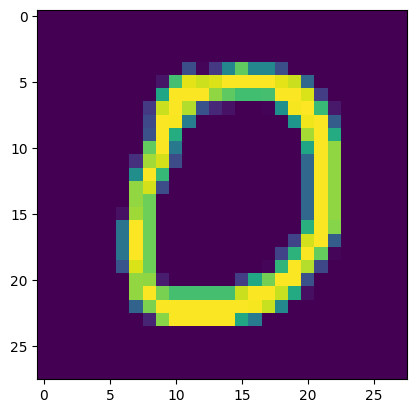

In [159]:
plt.imshow(x_test[10].reshape(28, 28))

In [165]:
y_hat[10]

array([-0.00591953,  0.00437704,  0.01958646,  0.00836835, -0.01310121,
       -0.00313588,  0.00131254, -0.00474462, -0.00316704, -0.00919528])

In [160]:
np.argmax(y_hat[10]) 

np.int64(2)

In [164]:
np.argmax(y_test[10])

np.int64(0)